<a href="https://colab.research.google.com/github/minit88/Matplotlib/blob/main/Lab_02/_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

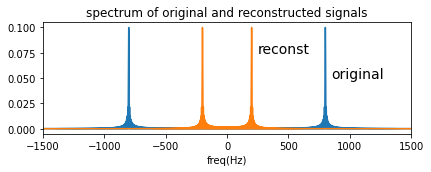

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.fft import fft, fftshift
def ctft(x, tp):
  N = 8*len(x)
  X = fftshift(fft(x,N)) * tp
  f = np.linspace(-0.5/tp, 0.5/tp, len(X), endpoint=False)
  return X, f

fs = 1000 # 샘플링 주파수
T = 0.01 # 신호의 플롯 구간 (0, T)
tp = 1/16000 # 플롯용 이산화 주기

x = lambda t, f0: np.sin(2*np.pi*f0*t)

f0 = 800
fig, ax = plt.subplots(figsize=(6,2.5))
tspectrum = np.arange(0, 20*T, tp)
xorg = x(tspectrum,f0)
Xorg, f = ctft(xorg, tp)
ax.plot(f, np.abs(Xorg))
xrecons = x(tspectrum,min(f0,f0-fs))
Xrecons, f = ctft(xrecons, tp)
ax.plot(f, np.abs(Xrecons)); ax.set(xlim=[-1.5*fs, 1.5*fs], xlabel='freq(Hz)')
ax.text(850, 0.05, 'original', horizontalalignment='left', fontsize=14)
ax.text(250, 0.075, 'reconst', horizontalalignment='left', fontsize=14)
ax.set_title('spectrum of original and reconstructed signals')
fig.tight_layout() 


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  app.launch_new_instance()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.


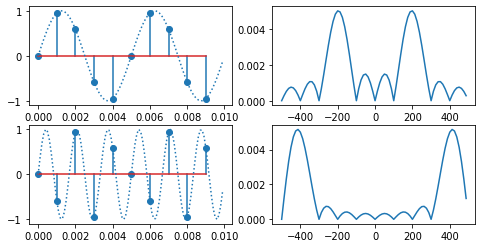

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.fft import fft, fftshift

def ctft(x, tp):
  N = 8*len(x) # 신호를 키우는 작업
  X = fftshift(fft(x,N)) * tp # 퓨리에 변환 fft(신호,포인트)
  f = np.linspace(-0.5/tp, 0.5/tp, len(X), endpoint=False)
  return X, f

fs = 1000 # 샘플링 주파수
T = 0.01 # 신호의 플롯 구간 (0, T)
sig = lambda t, f0: np.sin(2*np.pi*f0*t)
nTs = np.arange(0, T, 1/fs) 
fig, ax = plt.subplots(2,2, figsize=(8,4))
x1 = sig(nTs, 200); ax[0,0].stem(nTs, x1)
X1, f = ctft(x1, 1/fs)
ax[0,1].plot(f, np.abs(X1));
x2 = sig(nTs, 600); ax[1,0].stem(nTs, x2)
X2, f = ctft(x2, 1/fs)
ax[1,1].plot(f, np.abs(X2));

nTs2 = np.arange(0, T, 0.1/fs); 
x = sig(nTs2, 200); ax[0,0].plot(nTs2, x, ':')
x = sig(nTs2, 600); ax[1,0].plot(nTs2, x, ':')